<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/pipeline_gird_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pipelines de Machine Learning et GridSearchCV**


**Objectifs**

* Créer et évaluer un pipeline de Machine Learning
* Mettre en œuvre GridSearchCV pour le réglage des hyperparamètres avec validation croisée
* Mettre en œuvre et optimiser un pipeline de classification complexe à partir de données réelles
* Extraire l'importance des caractéristiques d'un pipeline entraîné

# **Introduction**

Dans les workflows d'apprentissage automatique, la classe Pipeline de Scikit-Learn est indispensable pour rationaliser le prétraitement des données et l'apprentissage du modèle en une séquence unique et cohérente. Un pipeline est essentiellement une séquence de transformateurs de données aboutissant à un prédicteur final optionnel. Cette structure permet une intégration transparente du prétraitement et de la modélisation prédictive, garantissant que les mêmes transformations de données appliquées pendant l'apprentissage sont appliquées de manière cohérente aux nouvelles données pendant la prédiction.


Chaque étape intermédiaire d'un pipeline doit être un transformateur, ce qui signifie qu'elle doit implémenter les méthodes d'ajustement et de transformation. L'étape finale, généralement un modèle prédictif, ou estimateur, ne nécessite qu'une méthode d'ajustement. L'ensemble du pipeline peut être entraîné simultanément à l'aide d'une méthode comme GridSearchCV, ce qui produit un prédicteur autonome permettant de réaliser des prédictions sur des données non vues.

Il est important de noter que le pipeline permet de définir les paramètres de chacune de ces étapes en utilisant leurs noms et les noms de paramètres reliés par un double trait de soulignement __. Par exemple, si une étape du pipeline s'appelle imputer et que vous souhaitez modifier sa stratégie, vous pouvez lui transmettre un paramètre tel que imputer__strategy='median'. De plus, les étapes peuvent être entièrement remplacées en affectant un autre estimateur, voire ignorées en les définissant sur « passthrough » ou « None ».

L'un des principaux avantages d'un pipeline est qu'il permet une validation croisée complète et un réglage des hyperparamètres pour toutes les étapes simultanément. En intégrant le pipeline à GridSearchCV, vous pouvez affiner non seulement le modèle, mais aussi les étapes de prétraitement, optimisant ainsi les performances globales. Les pipelines sont essentiels pour les scénarios où le prétraitement implique des estimateurs effectuant des opérations telles que la mise à l'échelle, l'encodage de variables catégorielles, l'imputation de valeurs manquantes et la réduction de dimensionnalité. Ils garantissent que ces étapes sont appliquées de manière reproductible aux données d'entraînement et de test.

* Générer des données synthétiques pour réaliser des expériences ciblées avec scikit-learn
* Entraîner et évaluer un modèle de classification KNN à l'aide d'un pipeline
* Ajuster les hyperparamètres du modèle à l'aide d'un pipeline dans le cadre d'une recherche par grille de validation croisée
Construire un pipeline de classification par forêt aléatoire plus complexe à partir de données réelles
* Extraire l'importance des caractéristiques du pipeline entraîné

Votre objectif dans cet atelier est d'apprendre à construire et optimiser un modèle de machine learning complexe à l'aide d'un pipeline et de la validation croisée pour ajuster ses hyperparamètres.

In [ ]:
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
data = load_iris()
X, y = data.data, data.target
labels = data.target_names

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Instancier un pipeline composé de StandardScaler, PCA et KNeighborsClassifier**

# Étape 1 : Standardiser les features
# Étape 2 : Réduire les dimensions à 2 grâce à l'ACP
# Étape 3 : Classificateur des K plus proches voisins

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2),),
    ('knn', KNeighborsClassifier(n_neighbors=5,))
])

In [10]:
X_train, X_test, y_train, y_test  = train_test_split(X, y ,test_size=0.2, random_state=42, stratify=y)

In [11]:
pipeline.fit(X_train, y_train)

#  Evalaution du pipeline
test_score = pipeline.score(X_test, y_test)
print(f"{test_score:.3f}")

0.900


In [12]:
y_pred = pipeline.predict(X_test)

In [13]:
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

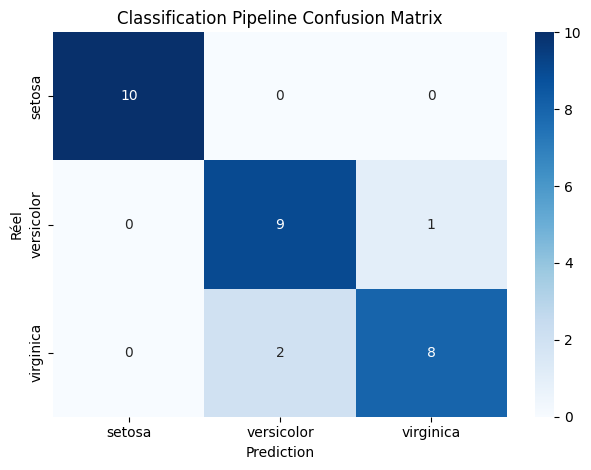

In [15]:
matrix_corr = confusion_matrix(y_test, y_pred)

plt.figure()

sns.heatmap(matrix_corr,annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Classification Pipeline Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Réel')

# Show the plot
plt.tight_layout()
plt.show()

Optimisation du modèle à l'aide de la validation croisée afin de regles les hyperparamètre

In [16]:
pipeline = Pipeline(
                    [('scaler', StandardScaler()),
                     ('pca', PCA()),
                     ('knn', KNeighborsClassifier())
                    ]
                   )

Définir une grille de paramètres de modèle sur laquelle effectuer une recherche

In [17]:
param_grid = {'pca__n_components': [2, 3],
              'knn__n_neighbors': [3, 5, 7]
             }

In [18]:
param_grid

{'pca__n_components': [2, 3], 'knn__n_neighbors': [3, 5, 7]}

Choisir une méthode de validation croisée
Pour garantir la stratification de la cible, nous pouvons utiliser la classe de validation croisée StratifiedKFold de scikit-learn.

In [19]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
best_model = GridSearchCV(estimator=pipeline,
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=2
                         )

**Ajuster le meilleur modèle GridSearchCV aux données d'entraînement**

In [21]:
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'pca__n_components': [2, 3]},
             scoring='accuracy', verbose=2)

Explorez le graphique GridSearchCV qui décrit la structure de votre estimateur, y compris les hyperparamètres trouvés pour le meilleur estimateur. Vous pouvez obtenir une aide spécifique sur chaque composant en cliquant sur son point d'interrogation.

In [22]:
test_score = best_model.score(X_test,y_test)
print(f"{test_score:.3f}")

0.933


In [23]:
# Affichage du meilleur paramètre
best_model.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 3}

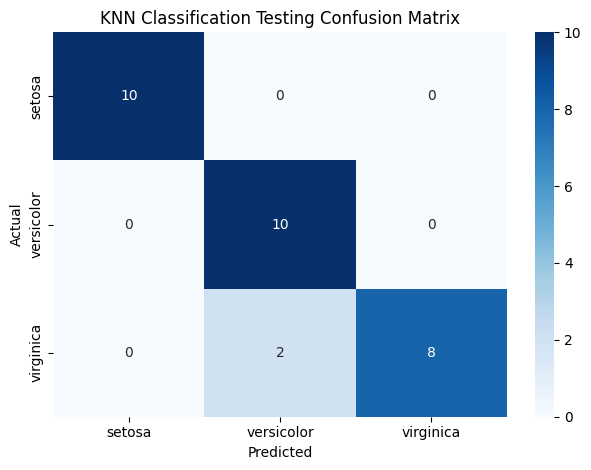

In [24]:
y_pred = best_model.predict(X_test)

# Generate the confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('KNN Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()